<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/GradienteDescendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import List

Vector = List[float]

height_weight_age = [70,  # inches,
                     170, # pounds,
                     40 ] # years

grades = [95,   # exam1
          80,   # exam2
          75,   # exam3
          62 ]  # exam4

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

assert magnitude([3, 4]) == 5

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))


def distance(v: Vector, w: Vector) -> float:  # type: ignore
    return magnitude(subtract(v, w))

# Another type alias
Matrix = List[List[float]]

A = [[1, 2, 3],  # A has 2 rows and 3 columns
     [4, 5, 6]]

B = [[1, 2],     # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
    """Returns (# of rows of A, # of columns of A)"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0   # number of elements in first row
    return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3)  # 2 rows, 3 columns

def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i]             # A[i] is already the ith row

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j]          # jth element of row A_i
            for A_i in A]   # for each row A_i

from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i

def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

data = [[70, 170, 40],
        [65, 120, 26],
        [77, 250, 19],
        # ....
       ]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

#            user 0  1  2  3  4  5  6  7  8  9
#
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],  # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],  # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],  # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]  # user 9

assert friend_matrix[0][2] == 1, "0 and 2 are friends"
assert friend_matrix[0][8] == 0, "0 and 8 are not friends"

# only need to look at one row
friends_of_five = [i
                   for i, is_friend in enumerate(friend_matrix[5])
                   if is_friend]

In [ ]:
#from scratch import Vector, dot
def sum_of_squares(v: Vector) -> float:
  """
  Computa a soma de elementos quadrados em v
  """
  return dot(v,v)

In [ ]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x+h)-f(x))/h

In [ ]:
def square(x:float)->float:
  return x*x

def derivative(x: float) -> float:
  return 2 * x

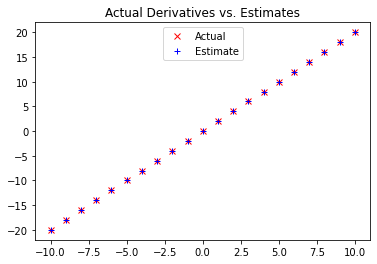

In [ ]:
xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plote para indicar que eles são essencialmente os mesmos
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') # vermelho x
plt.plot(xs, estimates, 'b+', label='Estimate') # azul +
plt.legend(loc=9)
plt.show()

In [ ]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """
    Retorna o quociente parcial das diferenças i de f em v
    """
    w = [v_j + (h if j == i else 0) #adicione h somente ao elemento i de v
         for j, v_j in enumerate(v)]
    return (f(w) -f(v))/h

In [ ]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float=0.0001):
  return [partial_difference_quotient(f, v, i, h)
      for i in range(len(v))]

Usando o gradiente...

In [ ]:
import random
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
  """
  Move `step_size` na direção de `gradient` a partir de `v`
  """
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size, gradient)
  return add(v, step)

def sum_of_squares_gradient(v: Vector) ->  Vector:
  return [2 * v_i for v_i in v]

# selecione um ponto de partida aleatório
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(1000):
  grad = sum_of_squares_gradient(v) # compute o gradiente em v
  v = gradient_step(v, grad, -0.01) # dê um passo negativo para o gradiente
  print(epoch, v)

assert distance(v, [0,0,0]) < 0.001 # v deve ser o próximo de 0

In [ ]:
# x vai de -50 a 49, y é sempre 20 * x +5
inputs = [(x, 20 * x +5) for x in range(-50,50)]

In [ ]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
  slope, intercept = theta
  predicted = slope * x + intercept # A previsão do modelo.
  error = (predicted - y)           # o erro é (previsto - real)
  squared_error = error ** 2        # Vamos minimizar o erro quadrático
  grad = [2 * error * x, 2 * error] # usando seu gradiente
  return grad

In [ ]:
# uso do vector_mean

# comece com valores aleatórios para a inclinação e o intercepto
theta = [random.uniform(-1,1), random.uniform(-1,1)]
learning_rate = 0.001

for epoch in range(5000):
  # Compute a média dos gradientes
  grad = vector_mean([linear_gradient(x,y,theta) for x, y in inputs])
  # dê um passo nessa direção
  theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

Minibatch e Gradiente Descendente Estocástico

In [ ]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # isso permite a inserção de funções "genéricas"

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool=True) -> Iterator[List[T]]:
                """
                Gera minibatches de tamanho `btach_size` a partir do conjunto de dados
                """
                # inicie os índices 0, batch_size, 2 * batch_size, ...
                batch_starts = [start for start in range(0, len(dataset), batch_size)]

                if shuffle: random.shuffle(batch_starts) #classifique os batches aleatoriamente

                for start in batch_starts:
                  end = start + batch_size
                  yield dataset[start:end]

In [ ]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
  for batch in minibatches(inputs, batch_size=20):
    grad = vector_mean([linear_gradient(x,y,theta) for x, y in batch])
    theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

In [ ]:
# gradiente descendente estocástico

theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(100):
  for x,y in inputs:
    grad = linear_gradient(x, y, theta)
    theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"